## 1 Introduction


Hey there! Welcome to this notebook about Text Summarization with NLP! In a time when there is a lot of written information available, summarization is essential for extracting important details from long documents and articles.

Throughout this notebook,

we will explore two primary approaches to text summarization: **extractive**, **abstractive** and How can we **evaluate** them.

1. **Extractive Summarization**: In this method, important sentences or phrases are **selected** directly from the input text to form the summary.

2. **Abstractive Summarization**: Here, the summary is **generated** by paraphrasing and rephrasing sentences to produce a coherent summary.

3. **Evaluation Time**: to evaluate the performance of these summarization approaches, several metrics can be used, but we will deal with **ROUGE** metric.

4. **Real-world Applications**: Text summarization has numerous practical applications across various industries and domains.

* you will find examples of code that have been transformed into functions using the **Google code style format**.
    * This formatting style follows a set of guidelines to enhance code readability, maintainability, and consistency.

Our goal is to provide step-by-step guidance on building both extractive and abstractive text summarization systems using NLP techniques. So let's get started!

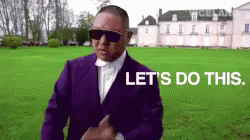

In [2]:
# Example document that we will use for summarization later on
document = """
Natural language processing (NLP) is a subfield of artificial intelligence that focuses on the interaction between computers and humans through natural language.
NLP techniques have gained significant traction in various applications, such as sentiment analysis,
machine translation, and text summarization. In text summarization,
the goal is to condense the content of a document or paragraph into a shorter form while retaining the core information.
There are two main approaches to text summarization: extractive and abstractive summarization.
Extractive summarization involves selecting sentences directly from the original text,
whereas abstractive summarization generates new sentences to form the summary. Both approaches have their strengths and weaknesses,
and the choice of approach depends on the specific use case.
"""

 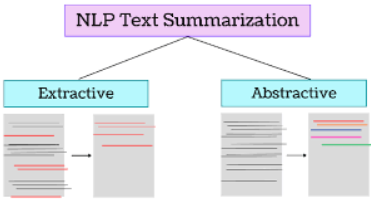

## 2 Extractive Text Summarization

Extractive summarization involves ***selecting the most relevant sentences or phrases*** from the input text to form the summary. It leverages various techniques to score and rank sentences based on their importance.

How extractive summarization Works?

**Text Preprocessing**: Tokenizing the input text, removing stop words, and performing any other necessary preprocessing steps.

**Sentence Scoring**: Assigning scores to individual sentences based on factors like sentence length, keyword frequency, and semantic similarity.

**Sentence Ranking**: Ordering sentences based on their scores and selecting the top-ranked sentences to form the summary.



> Let's see an example of extractive summarization using the Hugging Face Transformers library:

Skip this cell now so as not to confuse yourself

In [3]:
# To ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Install the transformers library
!pip install transformers
!pip install rouge

In [16]:
# Import the necessary modules
from transformers import pipeline

def perform_extractive_summarization(document):
    """
    Perform extractive summarization on the given document.

    Parameters:
        document (str): The input document to be summarized.

    Returns:
        str: The extracted summary of the input document.
    """
    # Load the extractive summarization pipeline
    summarizer = pipeline("summarization")
    # Set the parameters for extractive summarization
    
    # max_length: The maximum length of the generated summary in tokens.
    #             It controls the maximum size of the output summary.
    max_length = 100

    # min_length: The minimum length of the generated summary in tokens.
    #             It ensures that the output summary is not too short.
    min_length = 30

    # do_sample: Whether or not to use sampling in the summarization process.
    #            If set to True, it allows the model to generate more diverse summaries.
    #            If set to False, it uses greedy decoding, providing more deterministic results.
    do_sample = False

    # Perform extractive summarization using the specified parameters
    summary_extractive = summarizer(document, max_length=max_length, min_length=min_length, do_sample=do_sample)

    # Return the extracted summary
    return summary_extractive[0]['summary_text']

# Example usage:
summary_extractive = perform_extractive_summarization(document)
print(summary)


natural language processing (NLP) is a subfield of artificial intelligence that focuses on the interaction between computers and humans through natural language . the goal is to condense the content of a document or paragraph into a shorter form while retaining the core information .


As you can see it **takes** important statements from the original text that describe the meaning of all text.

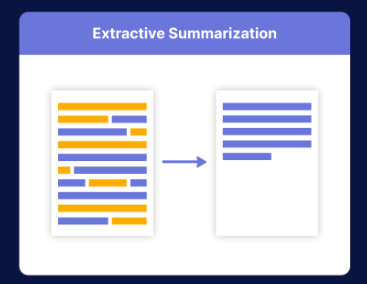

## 3 Abstractive Text Summarization

Abstractive summarization takes a more creative approach by **generating summaries** that may not be present verbatim in the original text. Instead, it paraphrases and rephrases sentences to produce a coherent summary.

How Abstractive Summarization Works?

**Preprocess the text**: Tokenize the text into sentences and words, remove stop words, punctuation, and perform any other necessary preprocessing (similar to extractive summarization).

**Train a Seq2Seq Model**: Train a sequence-to-sequence model, such as a transformer, with attention mechanism on a large dataset of paired original texts and summaries.

**Generate Summary**: During inference, feed the model with the original text and prompt it to generate the summary.


Abstractive summarization is often **more challenging** because the model needs to paraphrase and generate fluent sentences that capture the essence of the document.



> Let's see an example of abstractive summarization using the Hugging Face Transformers library:

In [17]:
def perform_abstractive_summarization(document):
    """
    Perform abstractive summarization on the given document.

    Parameters:
        document (str): The input document to be summarized.

    Returns:
        str: The abstractive summary of the input document.
    """
    # Load the abstractive summarization pipeline
    # model: The pre-trained model used for abstractive summarization.
    #        In this case, "t5-small" is a small version of the T5 model suitable for summarization tasks.
    # tokenizer: The tokenizer used to preprocess the input text for the model.
    #            In this case, we use the same "t5-small" tokenizer that matches the model.
    summarizer_abstractive = pipeline("summarization", model="t5-small", tokenizer="t5-small")

    # Set the parameters for abstractive summarization
    # max_length: The maximum length of the generated summary in tokens.
    #             It controls the maximum size of the output summary.
    max_length = 100

    # min_length: The minimum length of the generated summary in tokens.
    #             It ensures that the output summary is not too short.
    min_length = 30

    # do_sample: Whether or not to use sampling in the summarization process.
    #            If set to True, it allows the model to generate more diverse summaries.
    #            If set to False, it uses greedy decoding, providing more deterministic results.
    do_sample = True

    # Perform abstractive summarization using the specified parameters
    summary_abstractive = summarizer_abstractive(document, max_length=max_length, min_length=min_length, do_sample=do_sample)

    # Return the abstractive summary
    return summary_abstractive[0]['summary_text']

# Example usage:
summary_abstractive = perform_abstractive_summarization(document)
print(summary)

natural language processing (NLP) is a subfield of artificial intelligence that focuses on the interaction between computers and humans through natural language . the goal is to condense the content of a document or paragraph into a shorter form while retaining the core information .


As you can see it **Generates** some statements that describe the meaning of Original text.

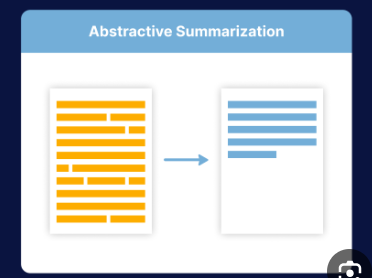

## 4 Evaluation Metrics for Text Summarization

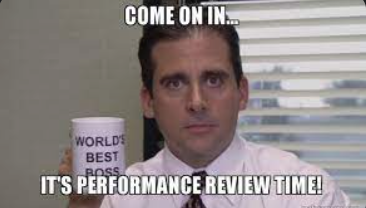

**"ROUGE" (Recall-Oriented Understudy for Gisting Evaluation) metric**

which is commonly used for evaluating the quality of automatic summarization systems. ROUGE is a set of metrics designed to measure the similarity between an automatically generated summary and reference summaries (human-generated summaries). It helps assess how well the automatic summary captures the key information from the original text.

**The most commonly used versions of ROUGE are ROUGE-N and ROUGE-L:**

ROUGE-N: This metric measures the overlap of n-grams between the generated summary and the reference summary. It typically includes ROUGE-1 (unigrams) and ROUGE-2 (bigrams), but higher values of N can also be used to consider longer n-grams.

ROUGE-L: This metric calculates the longest common subsequence between the generated summary and the reference summary. It considers the length of the common subsequence relative to the lengths of the generated and reference summaries.

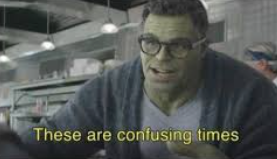

> **Let's assume we have a reference summary and an automatically generated summary for a given text.**

* Reference Summary: "The quick brown fox jumps over the lazy dog."
* Generated Summary: "A fast brown fox leaps over a sleeping dog."

Now, we will calculate the ROUGE-1 and ROUGE-2 scores for this example.

**ROUGE-1** measures the overlap of **unigrams (single words)** between the reference and generated summaries.
> 
* Reference Summary unigrams: [the, quick, brown, fox, jumps, over, the, lazy, dog]
* Generated Summary unigrams: [a, fast, brown, fox, leaps, over, a, sleeping, dog]

Number of overlapping unigrams: 4 (fox, brown, over, dog)

Total number of unigrams in the reference summary: 9

Total number of unigrams in the generated summary: 9

ROUGE-1 score = 4/9 ≈ 0.444

**ROUGE-2** measures the overlap of **bigrams (sequences of two words)** between the reference and generated summaries.

* Reference Summary bigrams: [(the, quick), (quick, brown), (brown, fox), (fox, jumps), (jumps, over), (over, the), (the, lazy), (lazy, dog)]
* Generated Summary bigrams: [(a, fast), (fast, brown), (brown, fox), (fox, leaps), (leaps, over), (over, a), (a, sleeping), (sleeping, dog)]

Number of overlapping bigrams: 2 (brown fox, over a)

Total number of bigrams in the reference summary: 8

Total number of bigrams in the generated summary: 8

ROUGE-2 score = 2/8 = 0.25

**ROUGE-L** measures the **longest common subsequence** between the reference and generated summaries.

* Longest Common Subsequence: "brown fox over dog"

ROUGE-L score ≈ 4/9 = 0.444

Interpretation:

ROUGE-1: The ROUGE-1 score is approximately 0.444, which means that 44.4% of the unigrams in the reference summary are also present in the generated summary.

ROUGE-2: The ROUGE-2 score is 0.25, suggesting that 25% of the bigrams in the reference summary are also present in the generated summary.

ROUGE-L: ROUGE-L score is approximately 0.444, indicating that 44.4% of the words in the reference summary are also present in the generated summary as the longest common subsequence. Like ROUGE-1.


> Let's use the nltk library to calculate these evaluation metrics for our summarization examples

In [18]:
# Import ROUGE
from rouge import Rouge

# Reference summary
reference_summary = "Natural language processing (NLP) is a subfield of artificial intelligence that focuses on the interaction between computers and humans through natural language."

# Extractive summary
extractive_summary = summary_extractive

# Abstractive summary
abstractive_summary = summary_abstractive

# Calculate ROUGE scores
rouge = Rouge()
rouge_scores_extractive = rouge.get_scores(extractive_summary, reference_summary)
rouge_scores_abstractive = rouge.get_scores(abstractive_summary, reference_summary)


print("ROUGE Scores for Extractive Summary:", rouge_scores_extractive)
print(150 * "=")
print("ROUGE Scores for Abstractive Summary:", rouge_scores_abstractive)

ROUGE Scores for Extractive Summary: [{'rouge-1': {'r': 1.0, 'p': 0.5526315789473685, 'f': 0.7118644021947717}, 'rouge-2': {'r': 1.0, 'p': 0.5384615384615384, 'f': 0.6999999954500001}, 'rouge-l': {'r': 1.0, 'p': 0.5526315789473685, 'f': 0.7118644021947717}}]
ROUGE Scores for Abstractive Summary: [{'rouge-1': {'r': 0.38095238095238093, 'p': 0.26666666666666666, 'f': 0.31372548535178785}, 'rouge-2': {'r': 0.14285714285714285, 'p': 0.09375, 'f': 0.11320754238519067}, 'rouge-l': {'r': 0.2857142857142857, 'p': 0.2, 'f': 0.23529411280276827}}]


Extractive Summary:

* ROUGE-1: Recall (R) = 1.0, Precision (P) = 0.5526, F1-score (F) = 0.7119
* ROUGE-2: Recall (R) = 1.0, Precision (P) = 0.5385, F1-score (F) = 0.7
* ROUGE-L: Recall (R) = 1.0, Precision (P) = 0.5526, F1-score (F) = 0.7118

The Extractive Summary system achieved perfect recall (R=1.0) for all three ROUGE metrics, indicating that it successfully captured all the important n-grams from the reference summary. However, the precision scores are lower (P≈0.55), suggesting that approximately 55% of the n-grams in the extractive summary are also present in the reference summary. The F1-scores provide a balanced evaluation, with F1≈0.71, reflecting the trade-off between recall and precision.

Abstractive Summary:

* ROUGE-1: Recall (R) = 0.3809, Precision (P) = 0.2667, F1-score (F) = 0.3137
* ROUGE-2: Recall (R) = 0.1429, Precision (P) = 0.0938, F1-score (F) = 0.1132
* ROUGE-L: Recall (R) = 0.2857, Precision (P) = 0.2, F1-score (F) = 0.2353

The Abstractive Summary system achieved relatively low recall values for all three ROUGE metrics. This indicates that the abstractive summary contains only a fraction of the important n-grams present in the reference summary. The precision scores are also low, indicating that there is a limited overlap between the n-grams in the abstractive summary and the reference summary. Consequently, the F1-scores are relatively low as well.

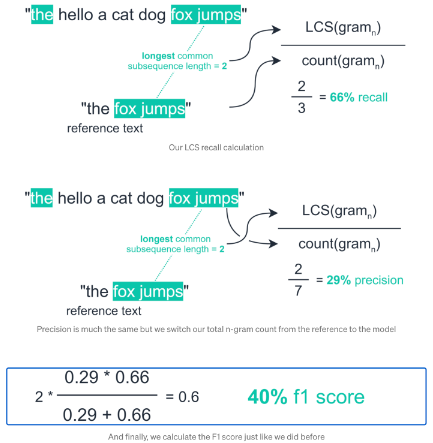

## 5 Real-world Applications of Text Summarization

Text summarization has numerous practical applications across various industries and domains. Here are some real-world applications where text summarization is beneficial:


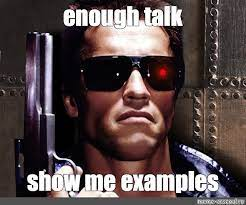

**News Aggregation**: News agencies and content aggregators use text summarization to provide concise summaries of news articles. This helps users quickly get an overview of the latest news without reading the entire article.

**Document Summarization**: In legal, academic, or business settings, lengthy documents such as contracts, research papers, or reports can be summarized to extract key points and save time for readers.

**Social Media**: Social media platforms can use text summarization to generate brief summaries of lengthy posts or threads. This allows users to grasp the main idea without scrolling through a large amount of text.

**Search Engine Result Snippets**: Search engines often display summarized snippets from web pages in their search results. Text summarization helps present the most relevant information to users.

**Email Summarization**: Email clients or virtual assistants can summarize long emails, allowing users to quickly understand the content and prioritize their responses.

**Chatbots and Conversational AI**: Chatbots and virtual assistants can use text summarization to provide brief responses that capture the essential information in a conversation.

**Audio/Video Summarization**: Automatic summarization can be applied to audio or video transcripts, providing concise summaries of recorded content.

**Automated Report Generation**: In data analysis and business intelligence, text summarization can be used to generate executive summaries for reports.

**Medical Records**: In the healthcare industry, summarizing medical records can aid in patient diagnosis and treatment planning.

## 6 Conclusion (Summarization)

In this Practical Guide to Text Summarization, we delved into the two mai...

What shaming am I doing?

Do it yourself, bro! You've learned how to utilize NLP to summarize anything.

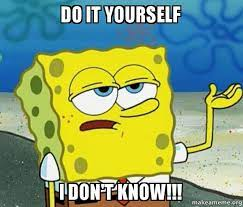

If you found this notebook helpful and informative, I would sincerely appreciate your support by **VOTING** for it.

Thank you for accompanying me on this NLP journey :)